# Maxwell's distribution of speed.

#### Import

In [29]:
import math as math
import random as random
import numpy as np
import matplotlib.pyplot as plt

#### Global constants

In [1]:
m = 3.2  # mass is in unit of Kb
Kb = 1.0


#### Input parameters

In [32]:
N = 100
u0 = 150.00
dv = 1.0

#### Starter 

In [3]:
def starter(key):
    u = [0.0  for k in range(N)]
    
    if key == 0:return u
    else:
        for k in range(N):
            u[k] = u0
     
   
    return u

#### Hamiltonian

In [4]:
def hamiltonian(u):
    H = 0.0
    for k in range(N):
          H = H + 0.5*u[k]**2
    return H

#### Pick a particle and change

In [5]:
def pick_random_particle(printkey):
    n = random.randint(0, N-1)
    if printkey == 1: print "particle picked  at",n
    return n

#### Thermalization

In [21]:
def thermalize(u,T,nruns,printkey):
    irun = 0
    h_stor = [0.0 for k in range(nrun)]
    while irun < nrun:
               L = len(u)
            
               h_old = hamiltonian(u)
              
               n = pick_random_particle(printkey)
               ov = u[n] 
               du = random.uniform(-dv,dv)
               u[n] = u[n] + du
              
                
               h_new = hamiltonian(u)
                
               dh = 0.5*m*(u[n]**2-ov**2)
               if printkey == 1:print  "=================", irun,"====================" 
                    
               if dh < 0:
                       
                        if printkey == 1: print irun, "Energy decreased! It is accepted!",dh
                        if printkey == 1: print irun, "old speed = ", ov,"replaced by",u[n] 
                            
                        h_stor[irun] = h_new
                       
               else:
                            
                       if printkey == 1:print irun, "Energy increased!",dh
                                
                       frac = math.exp(-dh/(Kb*T))
                       b = random.uniform(0.0,1.0)
                                
                       if printkey == 1:print "frac =",frac,"b =",b
                                    
                       if  b < frac:
                                        
                            if printkey == 1:print irun, "You Lucky"
                                
                            h_stor[irun] = h_new                             
                       else:
                                
                            if printkey == 1:print irun, "Loser"
                            if printkey == 1:print "speed restablished at", n, ":",u[n],"by",u[n]-du,"which is old",ov
                           
                            u[n]  = u[n] - du
                            h_stor[irun] = h_old 
                            
                            
              
               if u[n] != ov :                 
                   if printkey == 1:
                         print "Warning! speed changed at",n, ":", ov, " replaced by", u[n]        
                                    
               if printkey == 1:print  "---------------info-closed----------------"   
               if printkey == 1:print  ""                            
               if printkey == 2: print irun, h_stor[irun]   
                                                
               irun = irun +1
              
                   
    return h_stor,u
        
    

#### Simulation

#### Test

In [7]:
N = 10
u = starter(1)
T = 300.0
nrun = 100
H,u = thermalize(u,T,nrun,1)

particle picked  at 2
================= 0 ====================
0 Energy increased! 5.16166800614
frac = 0.982941610369 b = 0.296378524508
0 You Lucky
Warning! speed changed at 2 : 300.0  replaced by 300.017205067
---------------info-closed----------------

particle picked  at 0
================= 1 ====================
1 Energy increased! 23.3951734115
frac = 0.924979308072 b = 0.607024790315
1 You Lucky
Warning! speed changed at 0 : 300.0  replaced by 300.077973778
---------------info-closed----------------

particle picked  at 8
================= 2 ====================
2 Energy decreased! It is accepted! -28.9376550483
2 old speed =  300.0 replaced by 299.903525638
Warning! speed changed at 8 : 300.0  replaced by 299.903525638
---------------info-closed----------------

particle picked  at 0
================= 3 ====================
3 Energy increased! 17.437958518
frac = 0.943530556478 b = 0.639751221503
3 You Lucky
Warning! speed changed at 0 : 300.077973778  replaced by 300.13607957

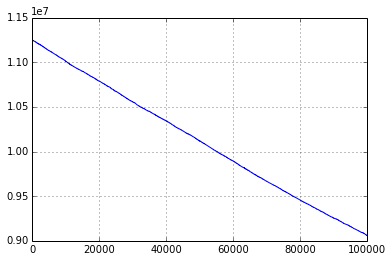

In [33]:
N = 1000
u = starter(1)
T = 300.0
nrun = 100000
H,u = thermalize(u,T,nrun,0)

X = np.arange(0,len(H),1)
plt.figure(1)
plt.grid()
plt.plot(X,H,"-")
plt.show()     
            

#### Speed Distribution

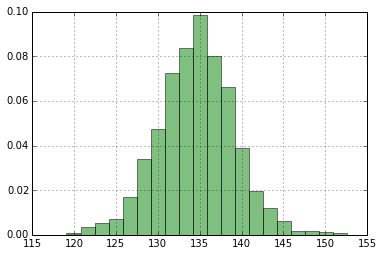

In [34]:

num_bins = 20
plt.figure(1)
plt.hist(u,num_bins, normed= 1.0, facecolor='green', alpha = 0.5)
plt.grid()
plt.show()

In [35]:
u

[152.53697392059593,
 128.31327589246823,
 140.436851808329,
 132.80382195754856,
 132.31407886817632,
 135.32050027807352,
 130.798459146321,
 129.09134596606734,
 135.03752198248986,
 141.62112963823625,
 138.27767642774265,
 130.71831125303953,
 136.86307540872224,
 121.34978066101247,
 132.73412663344874,
 131.8941976189342,
 132.94590280465187,
 139.99718986540782,
 126.30367606031899,
 136.6624201750959,
 134.71470758065294,
 140.22618602838844,
 128.3421710555995,
 131.18971363418476,
 137.2949504313762,
 133.9325213791171,
 132.3273444604972,
 137.01728024575485,
 138.7334279327667,
 131.73728297436287,
 142.15692647221064,
 131.59890748025197,
 129.69685418478122,
 130.3928982697706,
 133.33851141189984,
 135.70859014741555,
 139.5686898092376,
 130.42623900237018,
 138.1549314213626,
 134.1047535200175,
 134.11292649015837,
 125.42388153155485,
 124.57194118622577,
 131.7017625657973,
 129.20683563575193,
 128.04132499785734,
 130.85720902190866,
 137.82826258554866,
 133.457

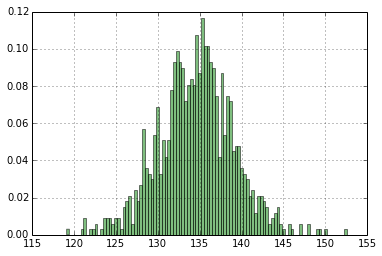

In [36]:
num_bins = 100
plt.figure(1)
plt.hist(u,num_bins, normed = 1.0, facecolor='green', alpha = 0.5)
plt.grid()
plt.show()